<a href="https://colab.research.google.com/github/faress-136/ML-Classification/blob/main/MLClassifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from matplotlib import pyplot

### File Read

In [7]:
data=pd.read_csv("/content/magic04.data", header = None)
data

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


Check For Null values (Not to ruin our data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19020 non-null  float64
 1   1       19020 non-null  float64
 2   2       19020 non-null  float64
 3   3       19020 non-null  float64
 4   4       19020 non-null  float64
 5   5       19020 non-null  float64
 6   6       19020 non-null  float64
 7   7       19020 non-null  float64
 8   8       19020 non-null  float64
 9   9       19020 non-null  float64
 10  10      19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


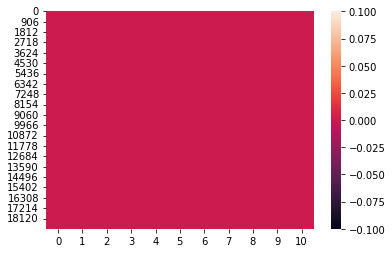

In [8]:
sb.heatmap(data.isnull())
data.info()     # all coloumns are non-null

# Data  Split 

In [ ]:
x, y = data.iloc[:, :-1], data.iloc[:, [-1]]  # split features and label
x, y = make_imbalance(x, y, sampling_strategy={'g': 6688, 'h': 6688}, random_state=14)
X_train, X_test, y_train, y_test =  train_test_split(x, y,
                                                     test_size=0.3,
                                                      train_size=0.7,
                                                      random_state=17)
# 
# X_train, y_train = ADASYN().fit_resample(X_train,y_train)
# print(X_train.value_counts())
# print(y_train.value_counts())


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

10
g     4682
h     4681
dtype: int64
10
h     2007
g     2006
dtype: int64


In [ ]:
y_train = np.ravel(y_train, order='C')

In [ ]:
def crossValidate(X_train, y_train, classifier):
    acc_list = [0, 0]
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    print('IN CROSS VALIDATION:\n\n')
    for fold in range(2, 100):  # Tested in range(2, 100)  and 19 was highest accuracy
        kf = KFold(n_splits=fold)
        kf.get_n_splits(X_train)
        acc = 0
        counter = 0
        for train_index, test_index in kf.split(X_train):
            KFX_train, KFX_test = X_train[train_index], X_train[test_index]
            KFy_train, KFy_test = y_train[train_index], y_train[test_index]
            classifier.fit(KFX_train, KFy_train)
            KFy_predict = classifier.predict(KFX_test)
            acc += accuracy_score(KFy_test, KFy_predict) * 100
            counter += 1
        acc = acc / counter
        if acc > acc_list[1]:
            acc_list = [fold, acc]
    return acc_list

#**Decision** **Tree** 

In [ ]:
model = DecisionTreeClassifier().fit(X_train, y_train)
y_predict = model.predict(X_test)
model.score(X_test, y_test) 

0.7924246199850485

In [ ]:
CorrectG, WrongG = confusion_matrix(y_test, y_predict)[0]
WrongH, CorrectH = confusion_matrix(y_test, y_predict)[1]
print("Confusion Matrix:\n")
print(f'CorrectG: {CorrectG}\t\tWrongG: {WrongG}\nCorrectH: {CorrectH}\t\tWrongH: {WrongH}\n')
print(f"Accuracy: {accuracy_score(y_test, y_predict) * 100}\n")
print('Report:')
print(f"{classification_report(y_test, y_predict)}\n", )

Confusion Matrix:

CorrectG: 1604		WrongG: 402
CorrectH: 1576		WrongH: 431

Accuracy: 79.24246199850485

Report:
              precision    recall  f1-score   support

           g       0.79      0.80      0.79      2006
           h       0.80      0.79      0.79      2007

    accuracy                           0.79      4013
   macro avg       0.79      0.79      0.79      4013
weighted avg       0.79      0.79      0.79      4013




# **AdaBoost**
Model Training

In [ ]:
# hyperParam = [1, 1, 0]
# acc_data = []
# for n in range(1,200):  # Tested in range(1, 200) 
#         clf = AdaBoostClassifier(n_estimators= n, learning_rate=1)
#         acc_list_temp = crossValidate(X_train, y_train, clf)
#         acc_data.append(acc_list_temp[1])
#         if acc_list_temp[1] > hyperParam[2]:
#             hyperParam = [n, acc_list_temp[0], acc_list_temp[1]]
# pyplot.plot(range(5, 205, 5), acc_data)
# pyplot.title('Ada Boost with N Estimators')
# pyplot.xlabel("K")
# pyplot.ylabel("Accuracy")
# pyplot.show()
# print(f'Best k = {hyperParam[0]} with best accuracy = {hyperParam[2]}')

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators= 165, learning_rate=1)

In [ ]:
model = AdaModel.fit(X_train, y_train)
y_predict2 = model.predict(X_test)
model.score(X_test, y_test) 

0.8253177174183902

In [ ]:
CorrectG, WrongG = confusion_matrix(y_test, y_predict2)[0]
WrongH, CorrectH = confusion_matrix(y_test, y_predict2)[1]
print("Confusion Matrix:\n")
print(f'CorrectG: {CorrectG}\t\tWrongG: {WrongG}\nCorrectH: {CorrectH}\t\tWrongH: {WrongH}\n')
print(f"Accuracy: {accuracy_score(y_test, y_predict2) * 100}\n")
print('Report:')
print(f"{classification_report(y_test, y_predict2)}\n", )

Confusion Matrix:

CorrectG: 1657		WrongG: 349
CorrectH: 1655		WrongH: 352

Accuracy: 82.53177174183902

Report:
              precision    recall  f1-score   support

           g       0.82      0.83      0.83      2006
           h       0.83      0.82      0.83      2007

    accuracy                           0.83      4013
   macro avg       0.83      0.83      0.83      4013
weighted avg       0.83      0.83      0.83      4013




# **Random Forest**

In [ ]:
# hyperParam = [1, 1, 0]
# acc_data = []
# for n in range(1,200):  # Tested in range(1, 200)  and 75 was highest accuracy
#         clf = ensemble.RandomForestClassifier(n_estimators= n)
#         acc_list_temp = crossValidate(X_train, y_train, clf)
#         acc_data.append(acc_list_temp[1])
#         if acc_list_temp[1] > hyperParam[2]:
#             hyperParam = [n, acc_list_temp[0], acc_list_temp[1]]
# pyplot.plot(range(5, 205, 5), acc_data)
# pyplot.title('Random Forest with N Estimators')
# pyplot.xlabel("K")
# pyplot.ylabel("Accuracy")
# pyplot.show()
# print(f'Best k = {hyperParam[0]} with best accuracy = {hyperParam[2]}')

In [ ]:
Forest_model = ensemble.RandomForestClassifier(n_estimators= 75)
Forest_model.fit(X_train , y_train)
y_predict3 = Forest_model.predict(X_test)
Forest_model.score(X_test, y_test)

0.8659357089459258

In [ ]:
CorrectG, WrongG = confusion_matrix(y_test, y_predict3)[0]
WrongH, CorrectH = confusion_matrix(y_test, y_predict3)[1]
print("Confusion Matrix:\n")
print(f'CorrectG: {CorrectG}\t\tWrongG: {WrongG}\nCorrectH: {CorrectH}\t\tWrongH: {WrongH}\n')
print(f"Accuracy: {accuracy_score(y_test, y_predict3) * 100}\n")
print('Report:')
print(f"{classification_report(y_test, y_predict3)}\n", )

Confusion Matrix:

CorrectG: 1783		WrongG: 223
CorrectH: 1692		WrongH: 315

Accuracy: 86.59357089459257

Report:
              precision    recall  f1-score   support

           g       0.85      0.89      0.87      2006
           h       0.88      0.84      0.86      2007

    accuracy                           0.87      4013
   macro avg       0.87      0.87      0.87      4013
weighted avg       0.87      0.87      0.87      4013




# **Naïve Bayes**

In [ ]:
Naive_model = GaussianNB()

In [ ]:
Naive_model.fit(X_train, y_train)
y_predict4 = Naive_model.predict(X_test)
Naive_model.score(X_test, y_test)

0.6508846249688512

In [ ]:
CorrectG, WrongG = confusion_matrix(y_test, y_predict4)[0]
WrongH, CorrectH = confusion_matrix(y_test, y_predict4)[1]
print("Confusion Matrix:\n")
print(f'CorrectG: {CorrectG}\t\tWrongG: {WrongG}\nCorrectH: {CorrectH}\t\tWrongH: {WrongH}\n')
print(f"Accuracy: {accuracy_score(y_test, y_predict4) * 100}\n")
print('Report:')
print(f"{classification_report(y_test, y_predict4)}\n", )

Confusion Matrix:

CorrectG: 1815		WrongG: 191
CorrectH: 797		WrongH: 1210

Accuracy: 65.08846249688513

Report:
              precision    recall  f1-score   support

           g       0.60      0.90      0.72      2006
           h       0.81      0.40      0.53      2007

    accuracy                           0.65      4013
   macro avg       0.70      0.65      0.63      4013
weighted avg       0.70      0.65      0.63      4013




# **K-Nearest Neigbhors**

In [ ]:
# hyperParam = [1, 1, 0]
# acc_data = []
# for k in range(1,200):  # Tested in range(1, 200)  and 7 was highest accuracy
#         clf = KNeighborsClassifier(n_neighbors=k)
#         acc_list_temp = crossValidate(X_train, y_train, clf)
#         acc_data.append(acc_list_temp[1])
#         if acc_list_temp[1] > hyperParam[2]:
#             hyperParam = [k, acc_list_temp[0], acc_list_temp[1]]
# pyplot.plot(range(5, 205, 5), acc_data)
# pyplot.title('KNN with K Tuned')
# pyplot.xlabel("K")
# pyplot.ylabel("Accuracy")
# pyplot.show()
# print(f'Best k = {hyperParam[0]} with best accuracy = {hyperParam[2]}')

In [ ]:
K_model = KNeighborsClassifier(n_neighbors= 7)
K_model.fit(X_train,y_train)
y_predict5 = K_model.predict(X_test)
K_model.score(X_test, y_test)


0.7737353600797409

In [ ]:
CorrectG, WrongG = confusion_matrix(y_test, y_predict5)[0]
WrongH, CorrectH = confusion_matrix(y_test, y_predict5)[1]
print("Confusion Matrix:\n")
print(f'CorrectG: {CorrectG}\t\tWrongG: {WrongG}\nCorrectH: {CorrectH}\t\tWrongH: {WrongH}\n')
print(f"Accuracy: {accuracy_score(y_test, y_predict5) * 100}\n")
print('Report:')
print(f"{classification_report(y_test, y_predict5)}\n", )

Confusion Matrix:

CorrectG: 1696		WrongG: 310
CorrectH: 1409		WrongH: 598

Accuracy: 77.37353600797408

Report:
              precision    recall  f1-score   support

           g       0.74      0.85      0.79      2006
           h       0.82      0.70      0.76      2007

    accuracy                           0.77      4013
   macro avg       0.78      0.77      0.77      4013
weighted avg       0.78      0.77      0.77      4013


